In [1]:
import numpy as np
import mpmath as mp
import math
import matplotlib.pyplot as plt
import itertools
from spatial_pp import SPP_LGCP
from gstools import Exponential

In [2]:
def outer_sum_terms(k, kappa):
    
    @np.vectorize
    def terms_to_k(k_set):
        return (
            ((-1) ** k_set * math.factorial(2*k_set + 1)) / 
            (2**(2*k_set) * (math.factorial(k_set))**2) * 
            kappa ** (2 * k_set)
        )

    k_set = np.arange(k + 1)

    return terms_to_k(k_set)
    
def gen_hyper_terms(k, sig2):
    
    k_set = np.arange(k+1)

    gen_hyper_store = np.zeros(k+1)

    for i in k_set:
        a = np.full(2*i + 3, 1); b = np.full(2*i + 3, 2)
        gen_hyper_store[i] = (
            mp.hyper(a, b, sig2)
        )

    return gen_hyper_store 

def full_sum_to_k(k, kappa, sig2, full_sum=True):

    if full_sum:
        full_sum = (
            np.sum(outer_sum_terms(k, kappa) * gen_hyper_terms(k, sig2))
        )
    else:
        full_sum = (
            np.cumsum(outer_sum_terms(k, kappa) * gen_hyper_terms(k, sig2))
        )

    return full_sum

def spectral_density(omega, mu, sig2, beta, k_max, full_sum=True):
    """
    Parameters:
        - omega: norm of (omega_x, omega_y).
        - mu: field mean.
        - sig2: field variance.
        - beta: exponential covariance scale.
        - k_max: where to truncate the sum 
    """
    kappa = np.pi * omega * beta
    f_trunc = (np.exp(mu + sig2/2) +
        2 * np.pi * np.exp(2 * mu + sig2) * (sig2 ** 2) * (beta ** 2) *
        full_sum_to_k(k_max, kappa, sig2, full_sum)
    )

    return f_trunc


8.120390684355431


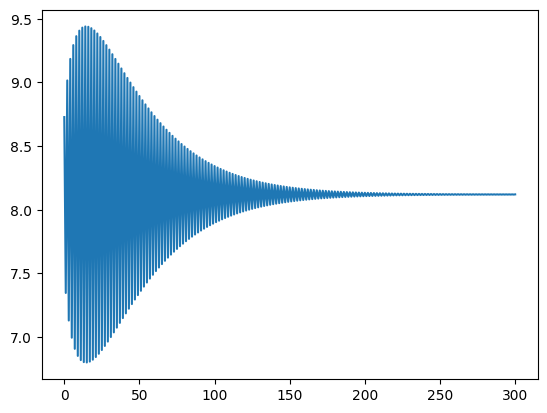

In [13]:
k = 300
k_set = np.arange(k + 1)
# plt.plot(k_set, full_sum_to_k(k, 0.99, 1))
mu = 2; sig2 = 0.1; beta = 0.5
omega = 1 / (beta * np.pi) - 0.01
# omega = 1.1194818197430287
# omega = 0.01
plt.plot(spectral_density(omega, mu, sig2, beta, k, False));
print(spectral_density(omega, mu, sig2, beta, k, True))

In [16]:
mu = 4; sig2 = 0.1; beta = 0.5
k = 200
omega_norm_max = 1/(beta * np.pi) - 0.01
omega_max = omega_norm_max / (2 ** 0.5)
omega_range = np.linspace(-omega_max, omega_max, 10)

spec_dens_store = np.zeros((len(omega_range), len(omega_range)))

for i, omega_x in enumerate(omega_range):
    print(f"Outer iteration: {i}")
    for j, omega_y in enumerate(omega_range): 
        omega = (omega_x ** 2 + omega_y ** 2) ** 0.5
        spec_dens_store[i,j] = spectral_density(omega, mu, sig2, beta, k)


Outer iteration: 0
Outer iteration: 1
Outer iteration: 2
Outer iteration: 3
Outer iteration: 4
Outer iteration: 5
Outer iteration: 6
Outer iteration: 7
Outer iteration: 8
Outer iteration: 9


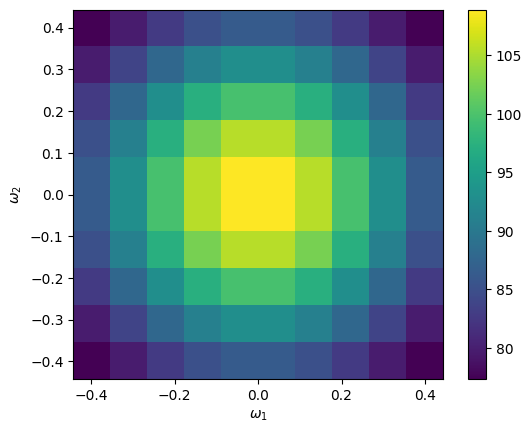

In [17]:
plt.imshow(spec_dens_store, 
        interpolation='nearest', 
        cmap=plt.cm.viridis, 
        extent=[omega_range[0],
                omega_range[-1],
                omega_range[0],
                omega_range[-1]])
plt.xlabel(r"$\omega_1$"); plt.ylabel(r"$\omega_2$")
plt.colorbar()

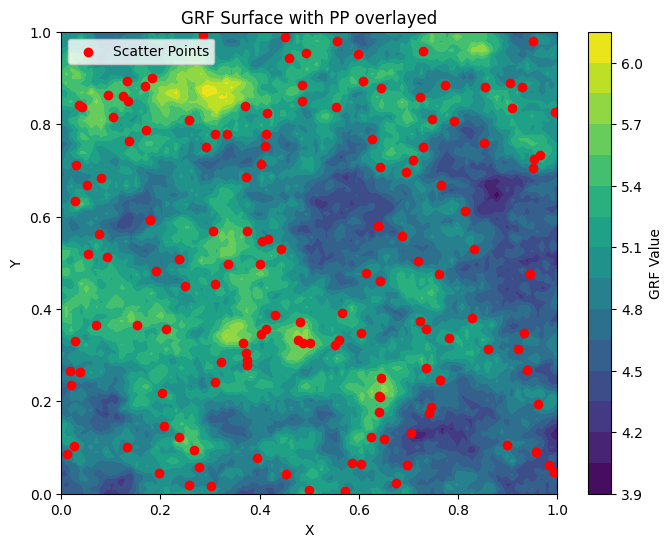

In [7]:
lgcp = SPP_LGCP(step_size=0.01)
LGCP_sampled = lgcp.simSPP(Exponential, {'dim': 2, 'var': 0.1, 'len_scale': 0.1}, mean=5)
lgcp.plot()

In [14]:
1 / (2**3/2 * np.pi ** 2)

0.025330295910584444